# 一元回归
## 一元一次回归

In [39]:
fit <- lm(weight ~ height, data=women)

In [4]:
summary(fit)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


In [6]:
women$weight

[1] 115 117 120 123 126 129 132 135 139 142 146 150 154 159 164

In [7]:
fitted(fit)

1        2        3        4        5        6        7        8 
112.5833 116.0333 119.4833 122.9333 126.3833 129.8333 133.2833 136.7333 
       9       10       11       12       13       14       15 
140.1833 143.6333 147.0833 150.5333 153.9833 157.4333 160.8833

In [8]:
residuals(fit)

1           2           3           4           5           6 
 2.41666667  0.96666667  0.51666667  0.06666667 -0.38333333 -0.83333333 
          7           8           9          10          11          12 
-1.28333333 -1.73333333 -1.18333333 -1.63333333 -1.08333333 -0.53333333 
         13          14          15 
 0.01666667  1.56666667  3.11666667

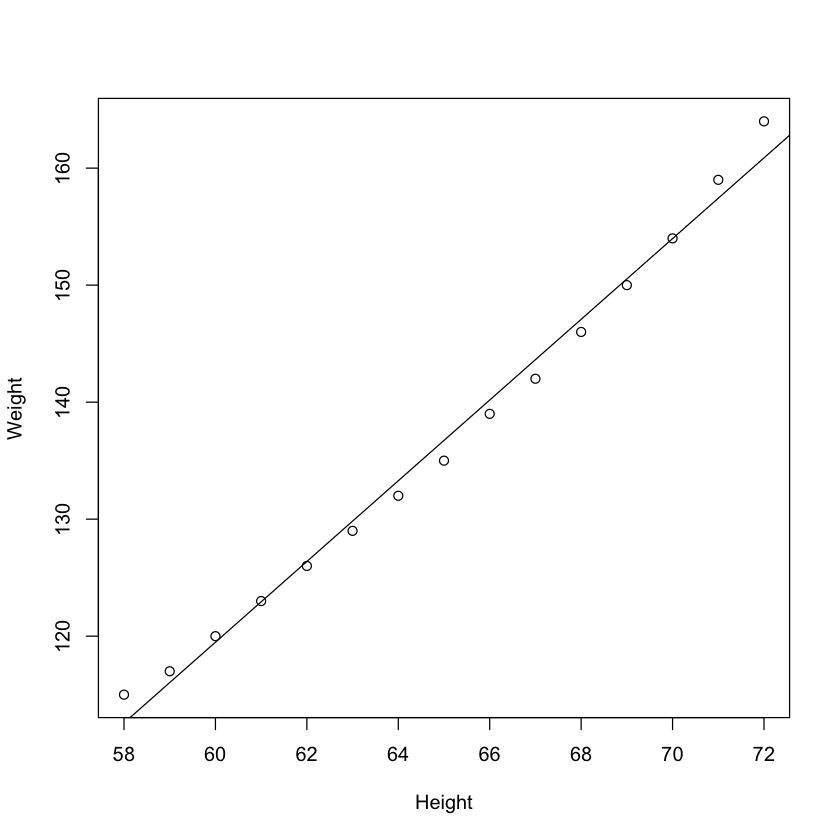

In [9]:
plot(women$height, women$weight, xlab="Height", ylab="Weight");
abline(fit)

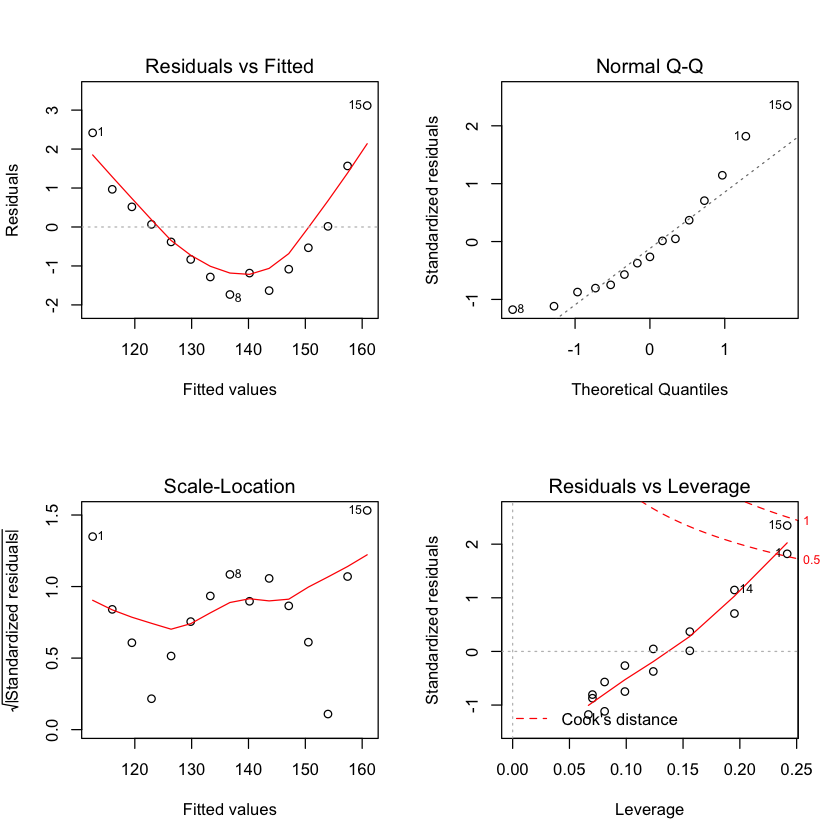

In [40]:
par(mfrow=c(2,2))
plot(fit)

## 一元多项式回归

In [41]:
fit2 <- lm(weight ~ height + I(height^2), data=women)
summary(fit2)


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 261.87818   25.19677  10.393 2.36e-07 ***
height       -7.34832    0.77769  -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598  13.891 9.32e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


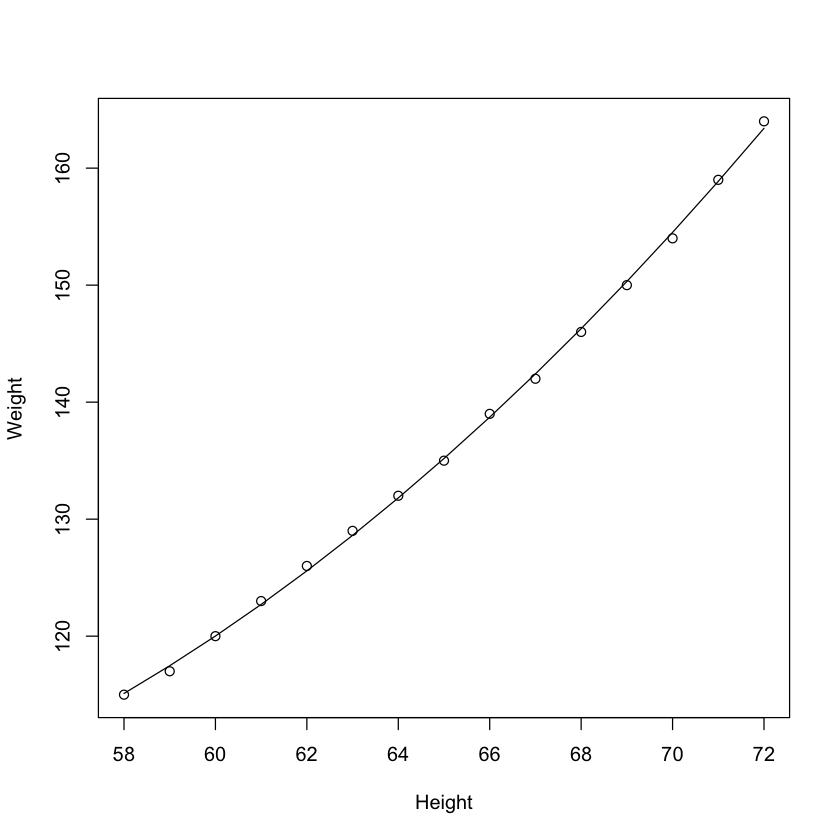

In [12]:
plot(women$height, women$weight, xlab="Height", ylab="Weight");
lines(women$height, fitted(fit2))

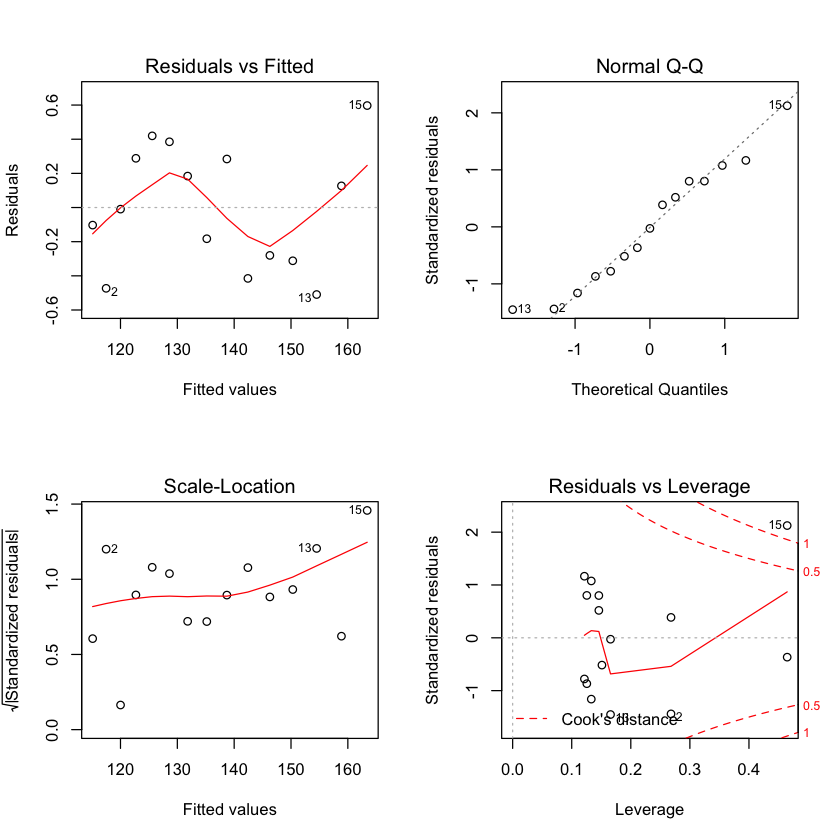

In [42]:
par(mfrow=c(2,2))
plot(fit2)

In [7]:
library(car)

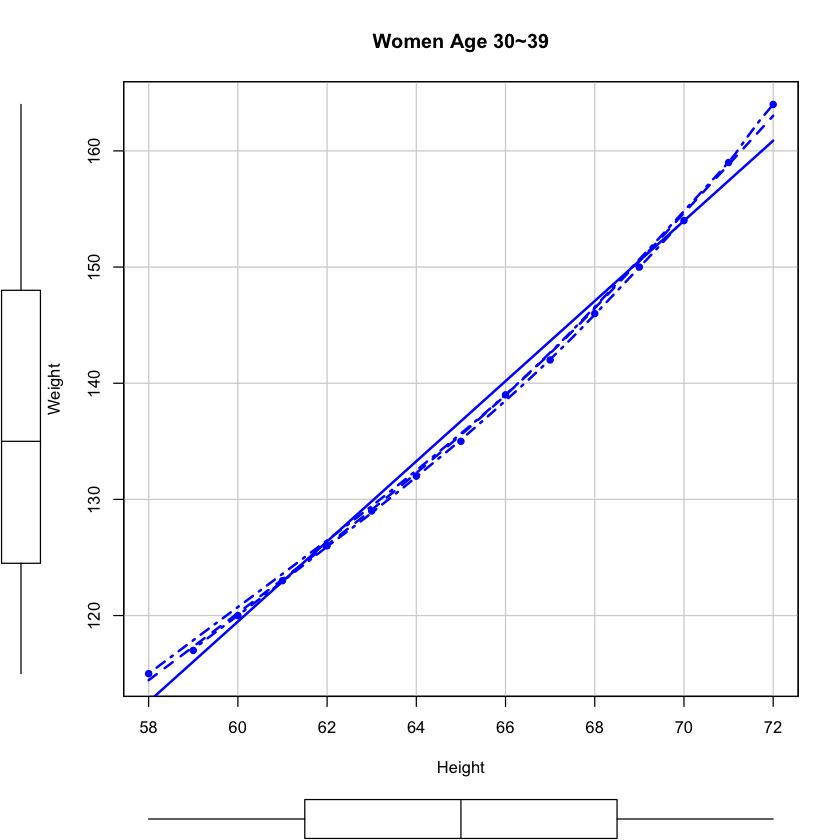

In [5]:
scatterplot(weight ~ height, data=women, smooth=TRUE, pch=19, 
           main="Women Age 30~39", 
           xlab="Height", ylab="Weight")

## 多元回归

In [43]:
states <- as.data.frame(state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")])


In [26]:
cor(states)

,Murder,Population,Illiteracy,Income,Frost
Murder,1.0000000,0.3436428,0.7029752,-0.2300776,-0.5388834
Population,0.3436428,1.0000000,0.1076224,0.2082276,-0.3321525
Illiteracy,0.7029752,0.1076224,1.0000000,-0.4370752,-0.6719470
Income,-0.2300776,0.2082276,-0.4370752,1.0000000,0.2262822
Frost,-0.5388834,-0.3321525,-0.6719470,0.2262822,1.0000000


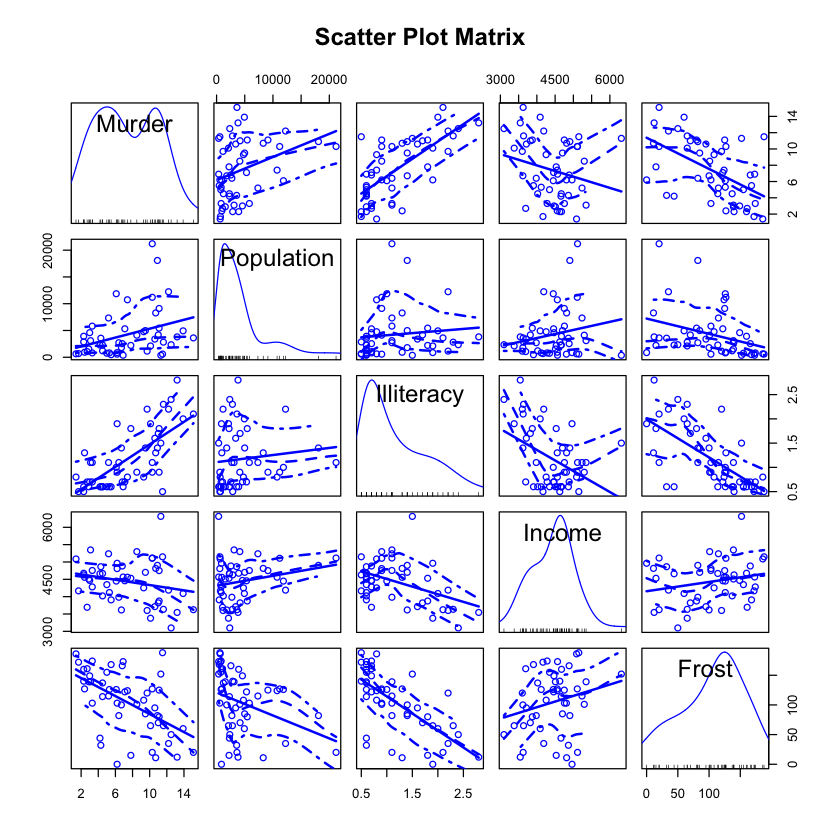

In [27]:
scatterplotMatrix(states,  main="Scatter Plot Matrix")

In [44]:
model <- lm(Murder ~ Population + Illiteracy + Income + Frost, data = states)

In [29]:
summary(model)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


In [38]:
confint(model)

,2.5 %,97.5 %
(Intercept),-6.552191e+00,9.0213182149
Population,4.136397e-05,0.0004059867
Illiteracy,2.381799e+00,5.9038743192
Income,-1.312611e-03,0.0014414600
Frost,-1.966781e-02,0.0208304170


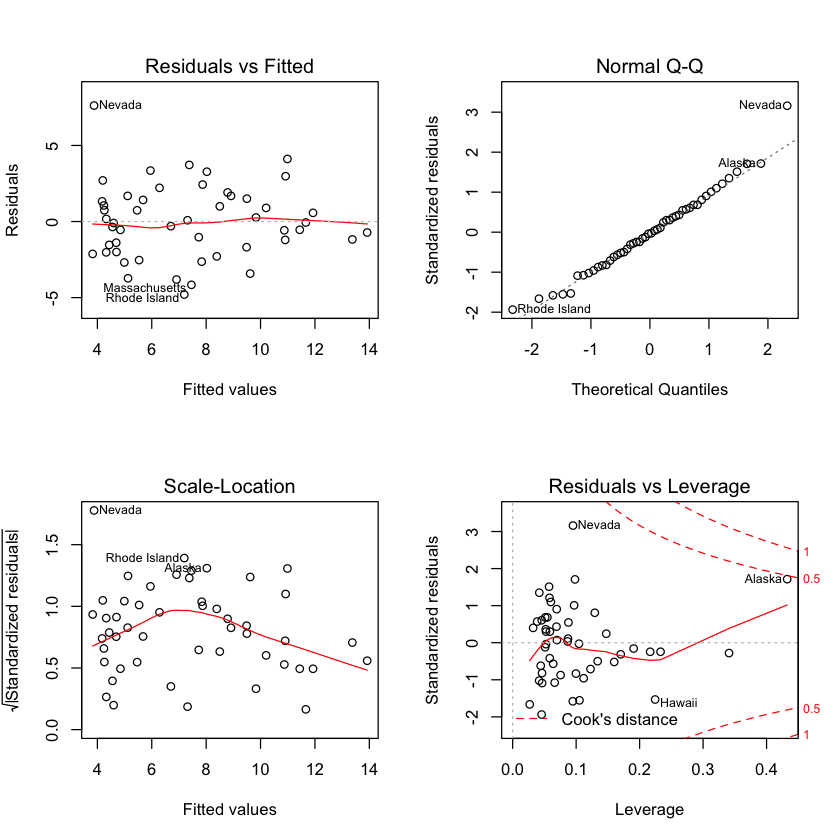

In [45]:
par(mfrow=c(2,2))
plot(model)

Nevada Rhode Island 
          28           39

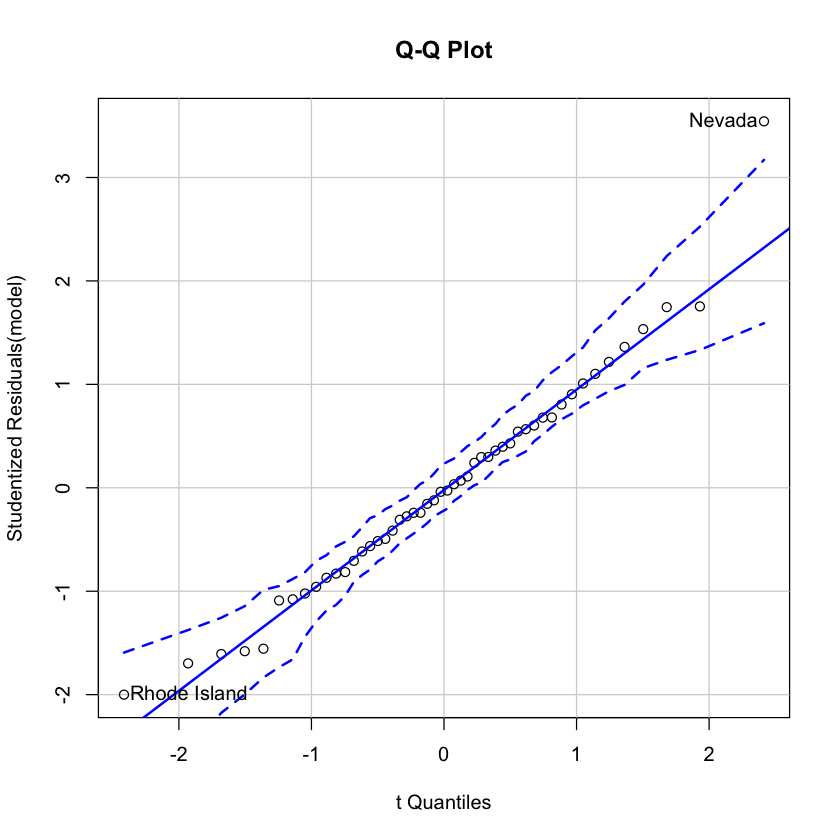

In [46]:
qqPlot(model, labels=row.names(states), id.method="identity", 
      simulate=TRUE, main="Q-Q Plot")

In [47]:
states["Nevada", ]

,Murder,Population,Illiteracy,Income,Frost
Nevada,11.5,590,0.5,5149,188


In [48]:
fitted(model)["Nevada"]

Nevada 
3.878958

In [50]:
residuals(model)["Nevada"]

Nevada 
7.621042

In [51]:
rstudent(model)["Nevada"]

Nevada 
3.542929

In [52]:
residplot <- function(fit, nbreaks=10) {
    z <- rstudent(fit)
    
    hist(z, breaks=nbreaks, freq = FALSE, 
        xlab="Studentized Residual", 
        main="Distribution of Errors")
    
    rug(jitter(z), col="brown")
    
    curve(dnorm(x, mean=mean(z), sd=sd(z)), 
         add=TRUE, col="blue", lwd=2)
    
    lines(density(z)$x, density(z)$y, col="red", lwd=2, lty=2)
    
    legend("topright", 
          legend = c("Normal Curve", "Kernel Density Curve"), 
          lty=1:2, col=c("blue", "red"), cex=.7)
}

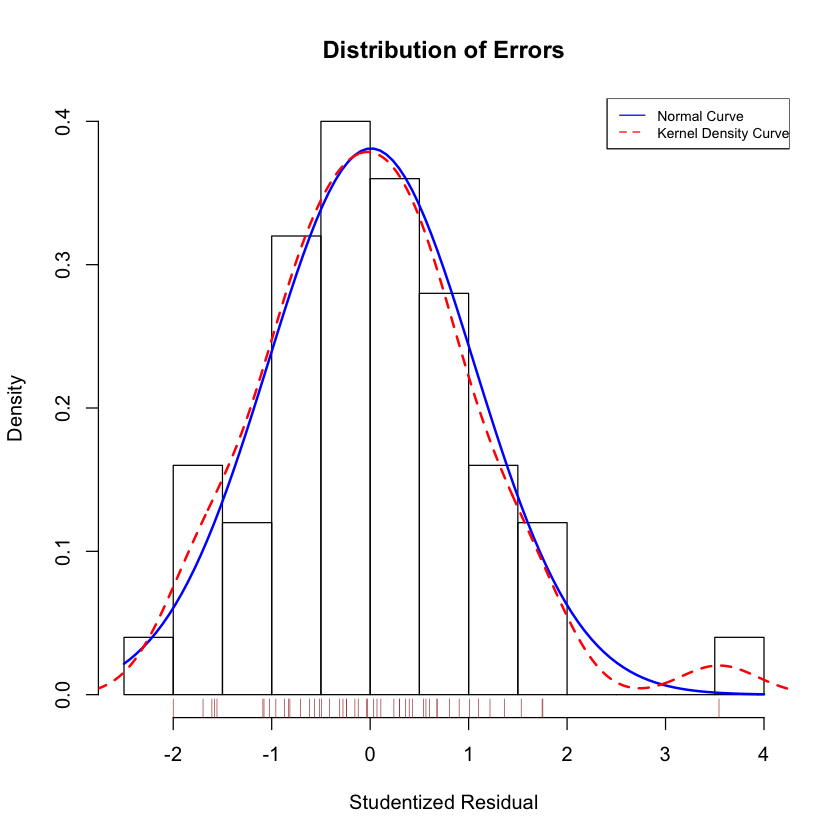

In [53]:
residplot(model)

## 交叉变量的影响

In [57]:
model <- lm(mpg ~ hp*wt, data=mtcars)
summary(model)


Call:
lm(formula = mpg ~ hp * wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0632 -1.6491 -0.7362  1.4211  4.5513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.80842    3.60516  13.816 5.01e-14 ***
hp          -0.12010    0.02470  -4.863 4.04e-05 ***
wt          -8.21662    1.26971  -6.471 5.20e-07 ***
hp:wt        0.02785    0.00742   3.753 0.000811 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.153 on 28 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8724 
F-statistic: 71.66 on 3 and 28 DF,  p-value: 2.981e-13


In [58]:
library(effects)

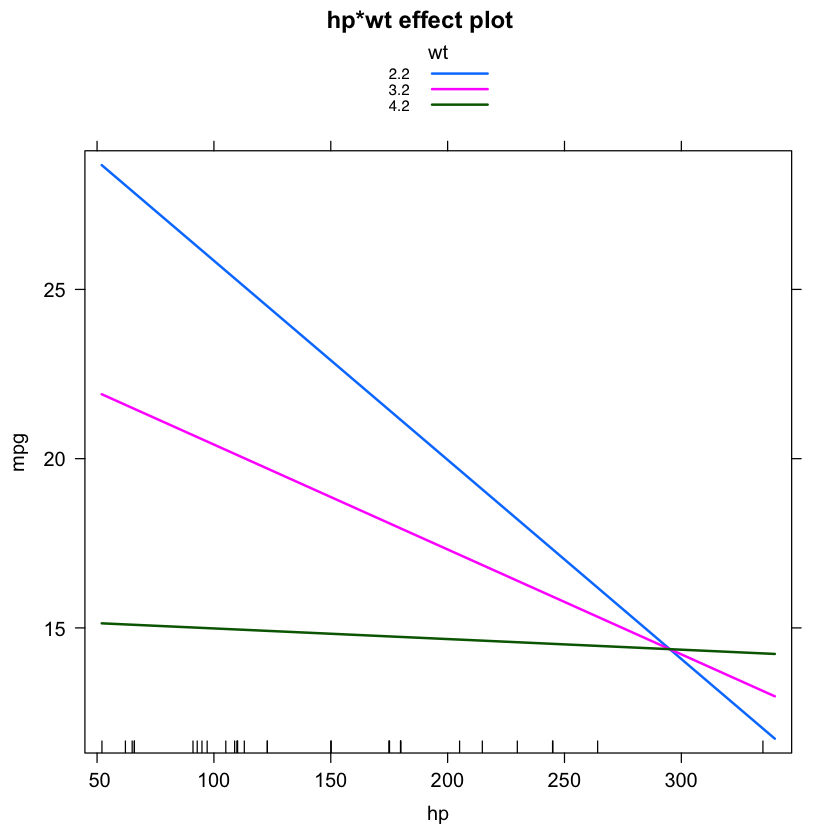

In [59]:
plot(effect("hp:wt", model, 
            xlevels=list(wt=c(2.2, 3.2, 4.2))), 
     multiline = TRUE)

In [68]:
model <- lm(mpg ~ hp + wt, data=mtcars)
summary(model)


Call:
lm(formula = mpg ~ hp + wt, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.941 -1.600 -0.182  1.050  5.854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.22727    1.59879  23.285  < 2e-16 ***
hp          -0.03177    0.00903  -3.519  0.00145 ** 
wt          -3.87783    0.63273  -6.129 1.12e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.593 on 29 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8148 
F-statistic: 69.21 on 2 and 29 DF,  p-value: 9.109e-12


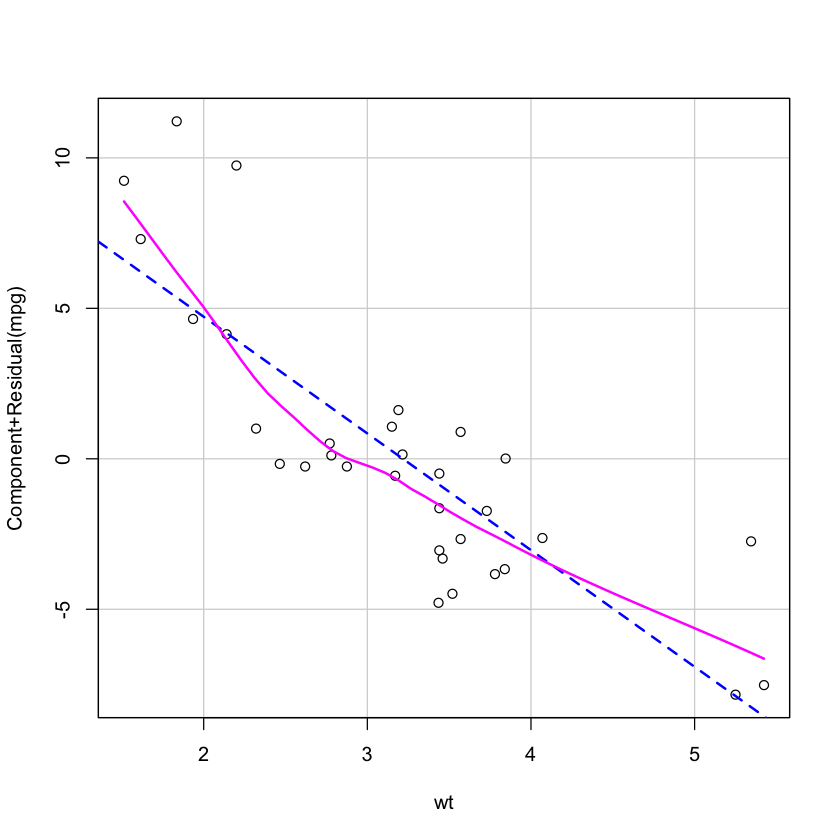

In [69]:
crPlot(model, variable="wt")

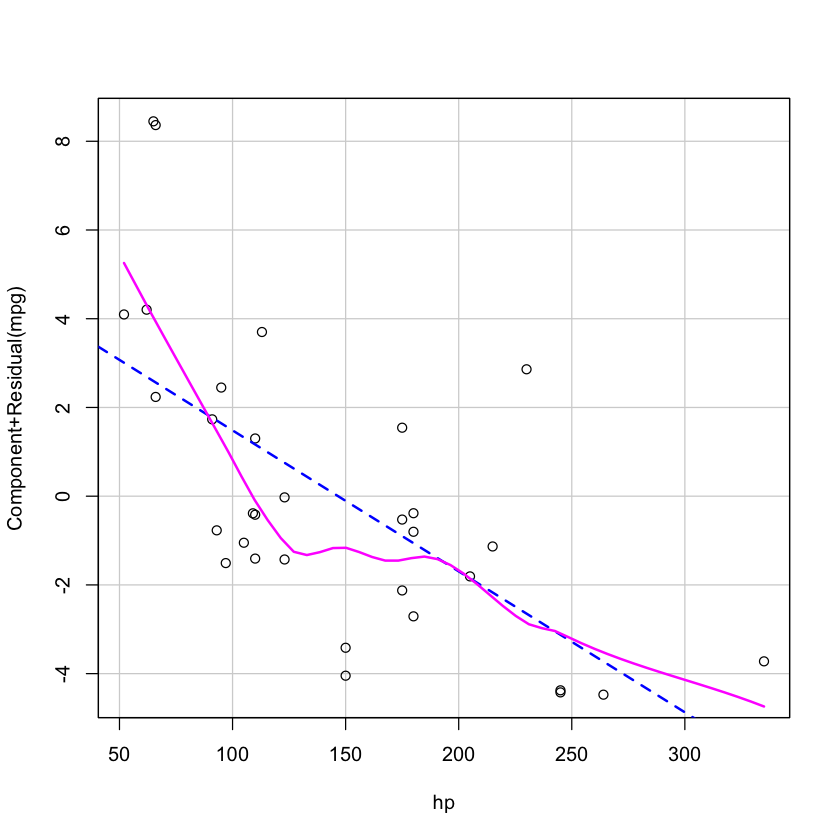

In [73]:
crPlot(model, variable="hp")

ERROR: Error in crPlot.lm(model): argument "variable" is missing, with no default
